# Impacto del clima en la frecuencia de viajes de taxis

La empresa Zuber está lazando su servicio de viajes compartidos en Chicago. Se busca comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes para poder generar la mejor estrategia para la empresa, para lograr esto analizaremos los datos disponibles sobre los competidores.

In [33]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
from statistics import mode
from datetime import datetime

## Análisis exploratorio de datos

En esta sección importaremos los datos, verificaremos los tipos de datos, valores nulos y duplicados. A partir de estos primeros 2 datasets se comenzarán a sacar conclusiones iniciales del comportamiento de los mismos.

In [34]:
# Carga los archivos de datos 
df_company = pd.read_csv('project_sql_result_01.csv')
df_location = pd.read_csv('project_sql_result_04.csv')
df_weather = pd.read_csv('project_sql_result_07.csv')

### df_company

In [35]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 840.0+ bytes


<b>Descripción de datos df_company</b>

- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

In [4]:
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
#Comprobamos que no hay valores ausentes
df_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [6]:
#Comprobamos que no hay valores duplicados
df_company.duplicated().sum()

0

Para el dataframe df_company no encontramos valores ausentes, duplicados y el tipo de datos es adecuado para la información contenida, por tanto, no se realizan cambios sobre este dataframe.

### df_location

In [7]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


<b>Descripción de datos df_location</b>

- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

In [8]:
df_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [9]:
#Redondeamos average_trips a 2 decimales para reducir la cantidad de decimales innecesarios
df_location = df_location.round({"average_trips":2}) 
df_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90


In [10]:
#Comprobamos que no hay valores ausentes
df_location.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [11]:
#Comprobamos que no hay valores duplicados
df_location.duplicated().sum()

0

Para el dataframe df_location observamos que tampoco hay valores ausentes ni duplicados y el tipo de datos es adecuado. Sin embargo, la columna average_trips presenta datos con demasiados decimales, para solucionar esto, se redondean los valores a 2 decimales.

### df_weather

In [40]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int64         
 3   weekday             871 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 30.6+ KB


<b>Descripción de datos df_company</b>

- start_ts: fecha y hora de recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

In [19]:
df_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


La columna start_ts es un string con las fecha y hora de inicio del viaje, por tanto, vamos a convertirlo a formato date_time

In [20]:
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'], format='%Y-%m-%d %H:%M:%S')
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 20.9+ KB


Observamos que la columna duration_seconds es de tipo flotante, aunque no contamos con fracciones de segundos, por tanto, convertirmos los datos a tipo entero.

In [21]:
#Convertimos duration_seconds a entero para quitar los decimales innecesarios
df_weather['duration_seconds'] = df_weather['duration_seconds'].astype('int64')
df_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


In [22]:
#Comprobamos que no hay valores ausentes
df_weather.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [23]:
#Comprobamos si hay valores duplicados
df_weather.duplicated().sum()

197

In [24]:
100*df_weather.duplicated().sum()/df_weather.shape[0]

18.44569288389513

El dataframe no cuenta con valores ausentes, pero sí cuenta con valores duplicados, el 18% de los datos, por lo tanto, los valores duplicados serán eliminados.

In [25]:
df_weather = df_weather.drop_duplicates()

### Los 10 principales barrios en términos de viajes terminados

Para encontrar los 10 principales barrios en terminos de viajes terminados organizamos la tabla por average_trips y nos quedamos únicamente con los primeros 10 filas.

In [12]:
top_location = df_location.sort_values(by='average_trips',ascending=False)

In [13]:
top_location = top_location.head(10)

In [14]:
top_location

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


<AxesSubplot:title={'center':'Top 10 locations per trips'}, ylabel='dropoff_location_name'>

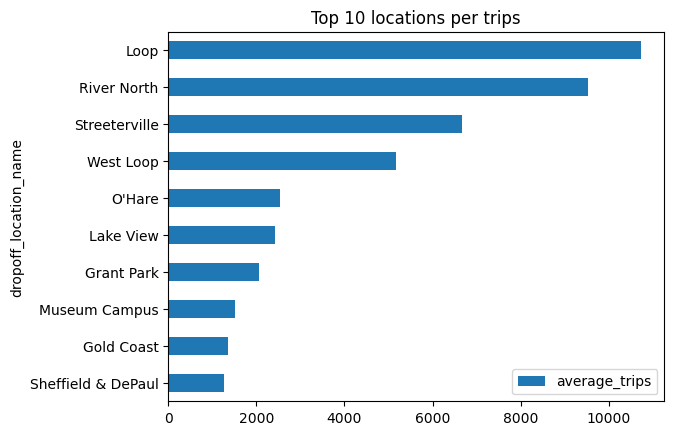

In [36]:
top_location = top_location.sort_values(by='average_trips',ascending=True)
top_location.plot(kind='barh', x='dropoff_location_name',title='Top 10 locations per trips')

Con este gráfico observamos las 10 primeras locaciones por promedio de viajes, de las cuales únicamente las primeras 40 superan los 4,000 viajes promedio.

### Las 10 principales compañías por cantidad de viajes

In [38]:
top_companies = df_company.sort_values(by='trips_amount',ascending=False)
top_companies = top_companies.head(10)
top_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<AxesSubplot:ylabel='company_name'>

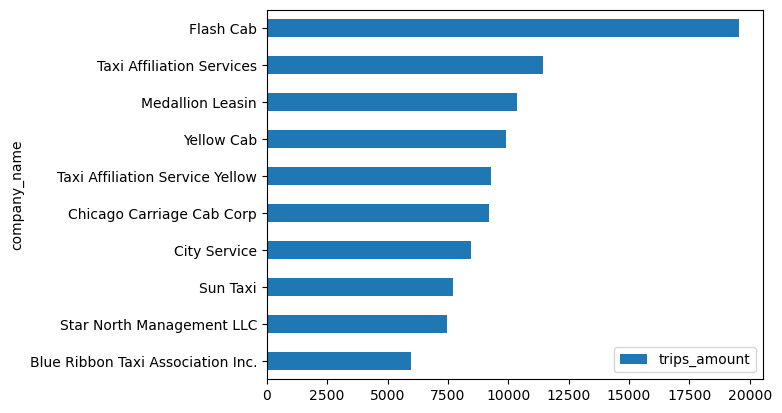

In [39]:
top_companies = top_companies.sort_values(by='trips_amount',ascending=True)
top_companies.plot(kind='barh', x='company_name')

De las primeras 10 compañías con más viajes podemos observar que Flash Cab tiene casi el doble de viajes que el segundo lugar, Taxi Afilliation Services, convirtiéndose en la compañía preferida por los usuarios. El resto de compañías presentan un comportamiento muy similar.

## Prueba de hipótesis

<b>"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"</b>

Esta será la hipótesis que queremos comprobar, para este caso nuestra hipótesis nula sería que el promedio de viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos que los sábados no lluviosos. La hipótesis alternativa sería que el promedio de viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no es igual los sábados lluviosos que los sábados no lluviosos.

Para comenzar con esta hipótesis cargaremos el archivo 'project_sql_result_07.csv', revisaremos la presencia de valores nulos, duplicados y el tipo de datos.

A continuación, vamos a obtener únicamente los registros de los días sábados.

In [26]:
df_weather['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [27]:
#Agregamos la columna weekday que nos ayudará a filtrar los registros de los días sábados únicamente, 
#weekday = 5
df_weather['weekday'] = df_weather['start_ts'].dt.weekday

In [28]:
df_weather.head()

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410,5
1,2017-11-25 14:00:00,Good,1920,5
2,2017-11-25 12:00:00,Good,1543,5
3,2017-11-04 10:00:00,Good,2512,5
4,2017-11-11 07:00:00,Good,1440,5


In [29]:
df_weather['weekday'].unique()

array([5], dtype=int64)

Observamos que todos los registros son de días sábados, por tanto, no es necesario filtrar los datos por día de la semana.

In [30]:
rainy_days = df_weather[df_weather['weather_conditions'] == 'Bad']

In [31]:
mean_rainy_days = rainy_days['duration_seconds'].mean()
mean_rainy_days

2409.2297297297296

In [32]:
alpha = 0.05

results = st.ttest_1samp(df_weather['duration_seconds'], mean_rainy_days)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  6.136666451128503e-30
Rechazamos la hipótesis nula


### Comparativa varianza

In [41]:
var_rainy_days = rainy_days['duration_seconds'].var()
print('Varianza en los dias lluviosos:')
var_rainy_days

Varianza en los dias lluviosos:


564819.443463872

In [42]:
var_saturdays = df_weather['duration_seconds'].var()
print('Varianza en los dias sábado:')
var_saturdays

Varianza en los dias sábado:


611953.7332435963

## Conclusiones

Al quedar rechazada la hipótesis nula, concluimos que el promedio de viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Por tanto, el clima, como factor externo, impacta en los viajes compartidos.

Al observar la varianza general contra la varianza en días lluviosos, se observa que en los días lluviosos hay una dispersión menor respecto a la media de viajes comparado al general.

Con esto podemos ver que al momento de planear una estrategia de negocio para la compañía, se tienen que tomar en cuenta factores externos como estos para que los resultados obtenidos no sean sorpresivos o se vean sesgados por una cuestión externa, como podría ser, que la empresa empiece a operar en temporada de lluvias.